In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# from skimage import data
from skimage import transform as tf
from skimage.transform import rotate

RESIZED_IMAGE_WIDTH = 20
RESIZED_IMAGE_HEIGHT = 30

classifications = np.loadtxt("classifications.txt") #, , fmt='%i')
flattened_images = np.loadtxt("flattened_images.txt")#,  fmt='%i')

In [2]:
def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

We have a single sample for each digit, so we want to use warpping to produce more samples. To do that, we need the un-flattened images.

In [3]:
images = [ np.reshape(z, (RESIZED_IMAGE_HEIGHT, -1)) for z in flattened_images ]

In [4]:
def show_row(images, original=None):
    
    if original:
        extra = 1
    else:
        extra = 0
    
    fig, ax = plt.subplots(ncols=len(images)+extra, sharex=False, sharey=False)
    
    if original:
        ax[0].imshow(original, cmap=plt.cm.gray)
        ax[0].axis('off')
    
    for i in range(len(images)):
      ax[i+extra].imshow(images[i], cmap=plt.cm.gray)
      ax[i+extra].axis('off')
    
    plt.show()

In [5]:
def show_all(images):
    [ show_row(z) for z in grouper(images, 6, np.zeros(images[0].shape, dtype=np.int)) ];

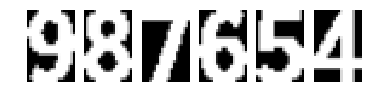

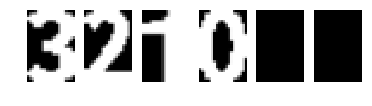

In [6]:
show_all(images)

Prep sample

In [8]:
import cv2

In [11]:
MIN_CONTOUR_AREA = 100

RESIZED_IMAGE_WIDTH = 30
RESIZED_IMAGE_HEIGHT = 30
# font = cv2.FONT_HERSHEY_SIMPLEX
font = cv2.FONT_HERSHEY_COMPLEX_SMALL

def preprocess_score_image(original):
    gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    _, bw_image = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    image = bw_image.copy()
    img_contours, npa_contours, npa_hierarchy = cv2.findContours(image,
                                                 cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_SIMPLE)

    flattened_digits =  np.empty((0, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT), dtype=np.int)

    for i, npa_contour in enumerate(npa_contours):
        if cv2.contourArea(npa_contour) > MIN_CONTOUR_AREA:
            [intX, intY, intW, intH] = cv2.boundingRect(npa_contour)

            cv2.rectangle(original, (intX, intY), (intX+intW,intY+intH), (0, 0, 255), 2)
            imgROI = image[intY:intY+intH, intX:intX+intW]
            resized = cv2.resize(imgROI, (RESIZED_IMAGE_WIDTH, RESIZED_IMAGE_HEIGHT))
            flattened = resized.reshape((1, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT))
            flattened_digits = np.append(flattened_digits, flattened, 0)


    return flattened_digits

In [18]:
test_source = cv2.imread("samples/test_score.png")
test = preprocess_score_image(test_source)
for digit in test:
    print(digit.shape)

(900,)
(900,)


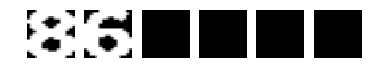

In [20]:
test_images = [ np.reshape(z, (RESIZED_IMAGE_HEIGHT, -1)) for z in test ]
show_all(test_images)

Test sample was taken at 30x30 instead of the 20x30 used by the training samples; will reshape the test sample

In [21]:
resized_test = []
for test_image in test:
    resized = cv2.resize(test_image, (RESIZED_IMAGE_WIDTH, RESIZED_IMAGE_HEIGHT))
    resized_test.append(resized)

for image in resized_test:
    print(image.shape)

error: /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215) func != 0 in function resize


In [19]:
print(flattened_images.shape)
print(classifications.shape)

(10, 600)
(10,)


In [14]:
from sklearn import svm


In [16]:
clf = svm.NuSVC()
clf.fit(flattened_images, classifications)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [17]:
clf.predict(test[0])

ValueError: Expected 2D array, got 1D array instead:
array=[  0.   0.   0.   0.   0. 110. 246. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 246. 110.   0.   0.   0.
   0.   0.   0.   0.   0.  51. 126. 190. 251. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 251. 190. 126.
  51.   0.   0.   0.   0.  19.  53. 134. 236. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 236. 134.  53.  19.   0.   0.  73. 202. 247. 254. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 254. 247. 202.  73.   0.   0.  76. 212. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 227. 139.  89.  89. 139. 227. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 240. 192. 166.  89. 139. 227. 255.
 255. 255. 255. 255. 255. 255. 246. 198. 138.  50.   0.   0.  50. 138.
 166. 166. 204. 252. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 248. 218.  89.   0.   0.   0.   0.
   0.   0.   0.   0. 110. 247. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 249. 147.  57.  23.   0.   0.
   0.   0.   0.   0.   0.   0. 110. 246. 255. 255. 255. 255. 255. 255.
 255. 255. 140. 174. 236. 255. 255. 255. 255. 255. 250. 175. 103.  42.
   0.   0.   0.   0.   0.   0.  42. 103. 175. 250. 255. 255. 255. 255.
 255. 255. 255. 255.   0.  76. 212. 255. 255. 255. 255. 255. 255. 255.
 233. 117.  32.  11.   0.   0.  11.  32. 117. 233. 255. 255. 255. 255.
 255. 255. 255. 249. 228. 217.   0.  76. 212. 255. 255. 255. 255. 255.
 255. 255. 251. 231. 181.  65.   0.   0.  65. 181. 231. 251. 255. 255.
 255. 255. 255. 255. 255. 219. 103.  38.   0.  34.  96. 166. 241. 255.
 255. 255. 255. 255. 255. 255. 236. 174. 140. 140. 174. 236. 255. 255.
 255. 255. 255. 255. 255. 241. 166.  96.  34.   0.   0.   0.   0.  70.
 172. 219. 253. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 253. 219. 172.  70.   0.   0.   0.   0.   0.
   0.   5.  11. 117. 247. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 247. 117.  11.   5.   0.   0.   0.
   0.   0.   0.  61. 149. 204. 252. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 246. 110.   0.   0.   0.
   0.   0.   0.  27.  74. 150. 238. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 249. 161.  89.
  89.  74.  27.   0.   0.  76. 212. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 253. 246. 242. 242. 246. 253. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 214.  85.  13.   0.  76. 212. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 223. 121.  64.  64. 121. 223. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 244. 210. 191. 115. 157. 232. 255. 255. 255.
 255. 255. 255. 255. 243. 182. 117.  42.   0.   0.  42. 117. 140. 140.
 190. 251. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 254. 233. 195.  79.   0.   0.   0.   0.   0.   0.
   0.   0. 110. 246. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 248. 132.  34.  14.   0.   0.   0.   0.
   0.   0.   0.   0. 110. 246. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 246. 110.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 110. 246. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 246. 110.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 110. 246. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 247. 110.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 110. 247. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 252. 204. 166. 166. 138.  50.   0.   0.   0.   0.  61. 149. 204. 252.
 255. 255. 255. 255. 255. 255. 255. 255. 166. 192. 240. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 227. 139.  89.  89.  89.  89. 150. 238.
 255. 255. 255. 255. 255. 255. 255. 240. 192. 166.   0.  73. 202. 247.
 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 212.  76.   0.   0.  19.
  53. 134. 236. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 212.  76.   0.
   0.   0.   0.  51. 126. 190. 251. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 251. 190. 140. 140. 117.
  42.   0.   0.   0.   0.   0.   0. 110. 246. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 246. 110.   0.
   0.   0.   0.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
fail here

Before applying any other transformations, let's add padding to serve as buffer for the results that will be off center

In [ ]:
def padding(image, pixels=3):
    return np.lib.pad(image, (pixels,pixels), 'constant', constant_values=(0,0))

In [ ]:
padded_iamges = [ padding(z) for z in images]

In [ ]:
pd.set_option('max_rows', 55)
oneimage = pd.DataFrame(padded_iamges[0])
print(oneimage)

In [ ]:
pd.reset_option('max_rows')

In [ ]:
show_all(padded_iamges)

One of the warping procedures will be [rotating at the center](https://stackoverflow.com/questions/25895587/python-skimage-transform-affinetransform-rotation-center)

In [ ]:
def center_rotate(image, degrees):
    shift_y, shift_x = np.array(image.shape[:2]) / 2. 
    # I guess the shape[:2] is to cut off a 3rd color dimension
    tf_rotate = tf.SimilarityTransform(rotation=np.deg2rad(degrees))
    tf_shift = tf.SimilarityTransform(translation=[-shift_x, -shift_y])
    tf_shift_inv = tf.SimilarityTransform(translation=[shift_x, shift_y])

    image_rotated = tf.warp(image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
    # so it shifts the center of the image to the origin point, then rotates, and then
    # shifts back the center of the image to the center of the "canvas"
    # All the "transforms" are matrices - why exactly this arithmetic works ...
    return image_rotated
    
    

Apply different degree of transformation:

In [ ]:
pad_n_rot = []
for i in padded_iamges:
   pad_n_rot += [ center_rotate(i, z) for z in range(-10,15,5) ]

Display the transformations

In [ ]:
def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [ ]:
show_all(pad_n_rot)

In [ ]:
def scale_up(image, pixels=3):
    resized = tf.resize(image,(image.shape[0]+pixels*2,image.shape[1]+pixels*2), mode='edge')
    return resized[pixels:-pixels, pixels:-pixels]

In [ ]:
scaled = [ scale_up(z) for z in padded_iamges ]

In [ ]:
show_all(padded_iamges + scaled)

In [ ]:
def scale_down(image, pixels=3):
    resized = tf.resize(image,(image.shape[0]+pixels*2,image.shape[1]+pixels*2), mode='edge')
    return padding(resized, pixels)

In [ ]:
scaled = [ scale_down(z) for z in padded_iamges ]
show_all(padded_iamges + scaled)

In [ ]:
oneimage.shape

In [ ]:
resized = tf.resize(oneimage,(46,36), mode='edge')
reform = resized[3:-3,3:-3]

In [ ]:
plt.figure(figsize=(20, 14));
ax = plt.subplot(1, 3, 1);
plt.imshow(oneimage);
plt.gray()
ax = plt.subplot(1, 3, 2);
plt.imshow(resized);
plt.gray()
ax = plt.subplot(1, 3, 3);
plt.imshow(reform);
plt.gray()

In [ ]:
[ print(z.shape) for z in [oneimage, resized]]

Another transformation will be translation